`Percolation Group 4 - ze22286, ea22802, db22401, gb22130`

# Table of Contents

- [Introduction](#introduction)
- [Task 1](#task-1)
- [Task 2](#task-2)
- [Task 3](#task-3)
- [Task 4](#task-4)
- [Task 5](#task-5)
- [Task 6](#task-6)
- [Task 9](#task-9)
- [Task 10](#task-10)
- [Conclusion](#conclusion)

## Introduction

This project delves into the study of percolation on square grids, a fundamental area within statistical physics and probability theory. We focus on the $n \times n$ square grid {0, $\ldots$, n-1\}$^2$, where sites are randomly assigned colours, yellow with probability $p$ and blue with probability $1-p$, independently. Utilising visualisation techniques such as 'pcolor' plots, we aim to gain insights into the behaviour of critical percolation for varying $n$ and $p$ values. Through algorithmic exploration, we develop methods to ascertain the presence of yellow paths connecting the left and right sides of the grid, contributing to the estimation of $F_{n}(p)$. We strive to optimise the efficiency of these algorithms to handle larger grid sizes effectively. By analysing graphs of $F_{n}(p)$, we seek to accurately estimate the critical point $p_{c}$, marking the transition from disconnected to connected regions. Additionally, we extend our investigation to rectangular grids of different dimensions, observing the consistency of the critical point across various grid shapes. Furthermore, we delve into the probability $G_{n}(p)$, representing the likelihood of a yellow path connecting the centre of the grid to the boundary, and explore its limit $G(p)$ as $n$ approaches infinity. We implement and evaluate different methodologies for detecting crossings, aiming to understand their computational complexities. Finally, we adopt a sophisticated approach utilising $Uniform[0, 1]$ random variables to sample all $p$ values simultaneously, facilitating a comprehensive exploration of critical percolation phenomena across diverse grid topologies. By exploring the behaviour of percolation phenomena on square grids and extending our investigations to diverse grid topologies, we seek to uncover fundamental insights that may inform theoretical frameworks and practical applications in related fields.

In [10]:
#Importing Libraries 
import random
import numpy as np 
import matplotlib.pyplot as plt
import time
from collections import deque
import math
import heapq
from scipy.stats import norm

## Task 1

1) Generating a matrix and simple find path algorithm to get a first idea of the problem 
2) A more efficient way to visuallise grids using matplotlib 
3) First ituitions on the critical value 
4) Another function to visualise a single grid 


In [28]:

#NOTE- This code is a simple way to generate a matrix visualisation as suggested in Q1, it wont be the grid creation method we use, 
# and we will refine the is path possible function too thus we call it 'old'

#creating a 4 by 4 grid 

grid = []                 #create empty grid 
def generate_matrix(p):
    grid = []
    for i in range(4):    #creating 4 rows 
        row = ['Y' if random.random() <= p else 'B' for i in range(4)]  #creating 4 elements in each row with probability yellow less than or equal p  
        grid.append(row)  #we then add this row to the grid 
    return grid

for row in grid:
    print(row)   #function will print this grid 



#Simple depth first search for a matrix!...

def is_path_possible_old(grid, p):
    def dfs(x, y):            #A depth first search 
        if y == n - 1:  # y == n - 1 checks if the current cell is at rightmost edge ie the last column 
            return True

        visited.add((x, y))

        # Check adjacent cells
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]: #iterates over the 4 possible directions 
            nx, ny = x + dx, y + dy                       #calculating new coordinates 
            if 0 <= nx < m and 0 <= ny < n and (nx, ny) not in visited and grid[nx][ny] == 'Y':  #checks new coordinates are in the bounds of the grid,
                                                                                                 #if cell not yet visited and cell contains a yellow element 
                if dfs(nx, ny):
                    return True   #calls dfs function and if recursice true, means a path has been found starting from (nx, ny) 

        return False

    m = len(grid)   #no of rows in grid 
    n = len(grid[0])#no of columns in grid 
    visited = set() #empty set visited 

    for i in range(m):                     #iterates over each row 
        if grid[i][0] == 'Y' and dfs(i, 0):#checks if leftmost column has a yellow and if there is a path starting from here. dfs is called to search 
            return True

    return False  #if such a yellow path is true, function returns true and false if not! 

# Example:
p = 0.7 # Probability of cell being yellow
grid = generate_matrix(p) #Creating grid 

print(is_path_possible_old(grid, p)) #deciding if path is possible 
for row in grid:
    print(row)    #printing the grid 




# FIND PROBABILITY OF THERE BEING A PATH FOR A SPECIFIC N AND P

n = 4
p = 0.7
no_of_simulations = 10000
no_of_simulations_true = 0   #will be used to count no of simulations in which a yellow path is found 
for i in range(no_of_simulations):
    grid = generate_matrix(p)  # will check 10000 grids and add one to no_of_simulations_true if exists a yellow path 
    if is_path_possible_old(grid, p) == True:
        no_of_simulations_true +=1 
        
print("\n")
print(no_of_simulations_true/no_of_simulations)  #then gives the proportion of true out of 10000

#this gives just one rough estimate for one value so its a very general result which doesnt tell us much at this point. 

True
['Y', 'Y', 'Y', 'Y']
['Y', 'Y', 'Y', 'B']
['B', 'Y', 'B', 'Y']
['Y', 'Y', 'Y', 'Y']


0.7964


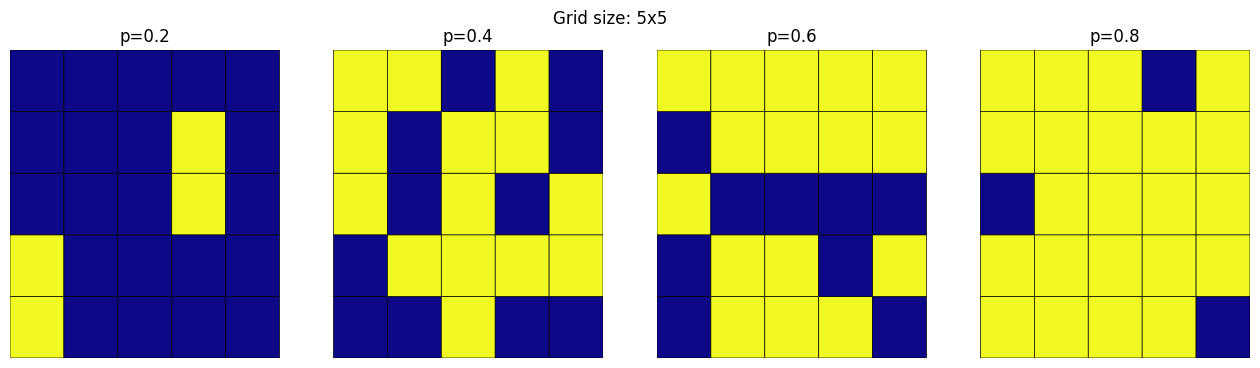

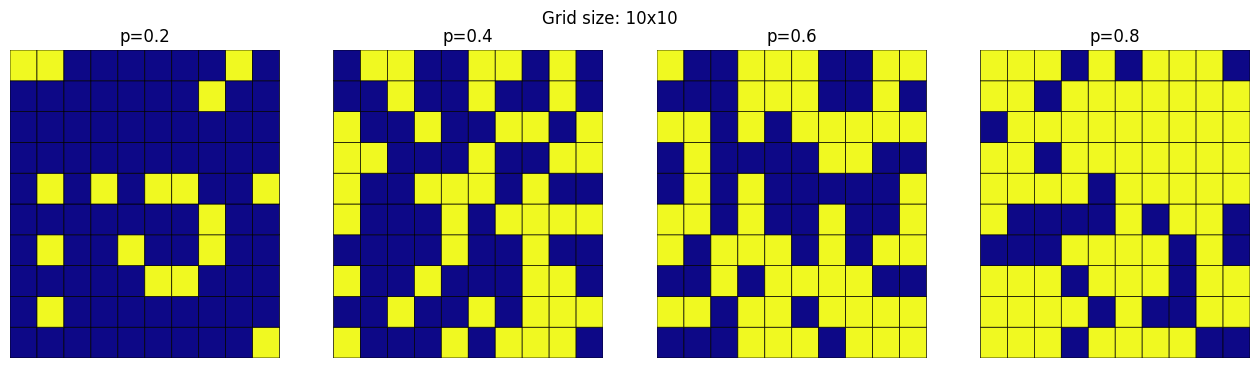

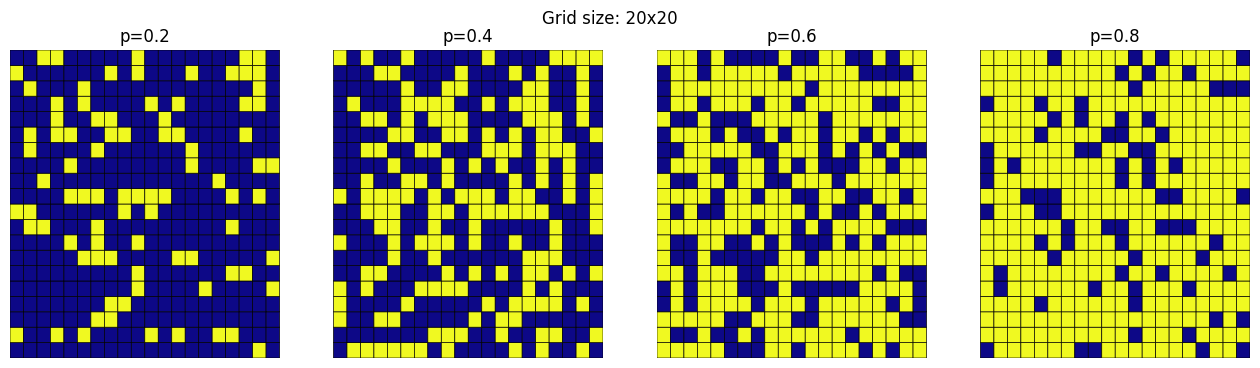

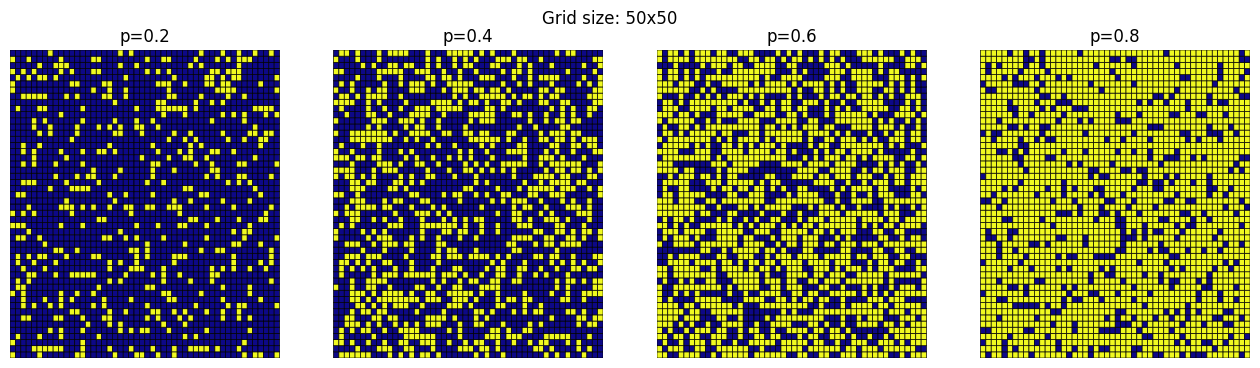

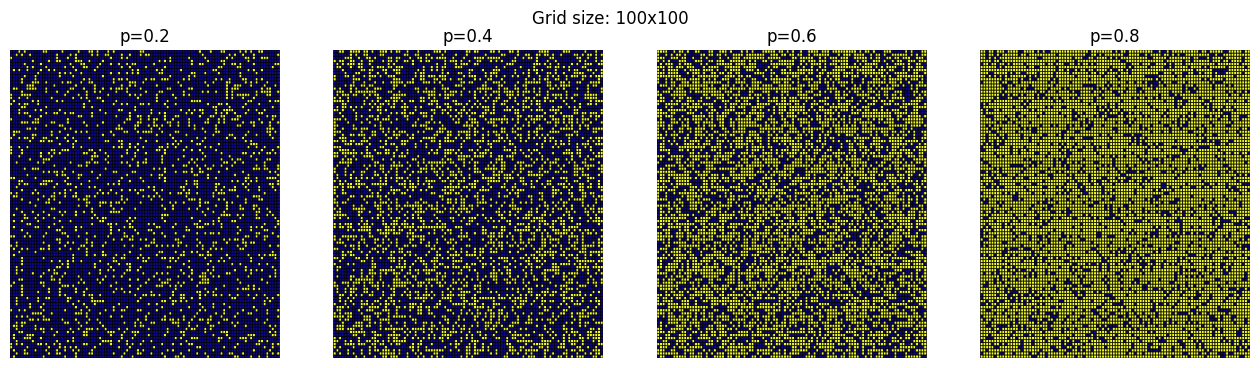

In [12]:
#A MORE EFFICIENT WAY TO GENERATE GRIDS! 
def generate_grid(n, p):      
    return np.random.choice([1, 0], size=(n, n), p=[p, 1-p])

#Making sure the grids are displayed well 
def plot_grid(grid, subplot, title):
    subplot.pcolor(grid[::-1], cmap='plasma', edgecolors='k', linewidths=0.5)
    subplot.set_title(title)
    subplot.axis('off')       #suitable colour maps and edgecolors ect 

n_values = [5,10, 20, 50, 100]  
p_values = [0.2, 0.4, 0.6, 0.8,]   #Setting a large range of n and p values p values distributed evenly (0.2 between each)! 

for n in n_values:  #iterates over each grid size 'n' in n vales list 
    fig, axs = plt.subplots(1, len(p_values), figsize=(len(p_values)*4, 4)) #formats each grid size into one row and all p values in columns 
    for i, p in enumerate(p_values): #loops over differing p values 
        grid = generate_grid(n, p) #generating grids of random elements probability p size n x n  
        title = f"p={p}"  #titles each subplot with the corresponding p value 
        #plotting on subplot 
        if len(p_values) > 1:
            plot_grid(grid, axs[i], title)
        else:
            plot_grid(grid, axs, title)  #covers the possiblity of only one grid
    
    fig.suptitle(f"Grid size: {n}x{n}")   #Titles the subplots neatly using the corresponding grid size 
    plt.show()

By inspecting visually, we can see that any probability below 0.6 is unlikely to create a path.
It also seems here like a bigger grid will create a higher likelihood of there being a path.

In [14]:
#another function to visualise a single grid outside of the subplots (may be useful later)

def visualise_grid(grid):
    plt.figure(figsize=(6,6))    #format is slightly different 
    # _r reverses the colour map so that 1 corresponds to yellow and 0 corresponds to blue
    plt.pcolor(grid, cmap='plasma', edgecolors='k', linewidths=0.5)
    plt.show()
    return None

## Task 2

1) Deciding on functions to use for reachable 
2) A method for finding the reachable sites 
3) A depth first search algorithim which may be helpful in the future
4) Example usage that we can visualise using red squares

In [15]:
#Defining functions that find and plot reachable sites 


#adding the reachable condition to the original plot grid function to check if this creates a good function. 

def plot_grid_with_reachable(grid, reachable, title):
    fig, ax = plt.subplots()
    plot_grid(grid, ax, title)
    for i, j in reachable:
        ax.text(j + 0.5, grid.shape[0] - i - 0.5, 'R', ha='center', va='center', color='red')  #coloring the reachable regions red 
    plt.show() 

    #Now finding out which sites could be in the reachable set. 
def find_reachable_sites(grid):
    m, n = grid.shape
    reachable = set()  #setting an empty set 
    
    # Initially, all yellow sites on the left side are reachable
    for i in range(m):
        if grid[i, 0] == 1:  # If the site is yellow
            reachable.add((i, 0)) #add to the reachable set 
     
    # Iteratively determine reachable sites
    while True:
        new_reachable = set()   #an empty set to store new reachable cells 
        for site in reachable:  #iterate over each cell in the current reachable set 
            i, j = site
            # Check adjacent cells
            for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                ni, nj = i + di, j + dj  #calculate coordinates of adjacent cell 
                if 0 <= ni < m and 0 <= nj < n and grid[ni, nj] == 1 and (ni, nj) not in reachable:
                #this checks if adjacent cell is within grid bounds and is reachable 
                    new_reachable.add((ni, nj)) #if all conditions are met, add it to the new reachable set 
        if not new_reachable:
            break   #if no new reachable cells, break the loop 
        reachable.update(new_reachable)  #update the reachable cells with the new ones 
    
    return reachable   




In [16]:

#A better search algorithm (exploring more to make the computations faster)

#Creating a slightly better path finder than from is_yellow_path(grid) for larger grids... 
def dfs(grid):
    m, n = grid.shape  #get the dimensions of our grid 
    
    def is_path_possible(x, y):
        if y == n - 1:  # Reached the rightmost column?
            return True

        visited.add((x, y))   #mark the cell as visited 

        # Check adjacent cells
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            nx, ny = x + dx, y + dy # checking the adjacent cell is within the bounds, it hasnt yet been visited and that it is a valid path 
            if 0 <= nx < m and 0 <= ny < n and (nx, ny) not in visited and grid[nx, ny] == 1:
            #recursively checks if the path is possible for adjacent cells 
                if is_path_possible(nx, ny):
                    return True

        return False  #if no path found, returns false 
#iterates over the cells in the leftmost column... 
    for i in range(m):
        if grid[i, 0] == 1: #check if theres a path starting from this cell 
            visited = set()
            if is_path_possible(i, 0): #check path is possible from this cell 
                return True
    #if no path found from any cell in leftmost column, return false 
    return False



In [17]:
#defining this outisde the dfs 


def is_path_possible(x, y):
        if y == n - 1:  # Reached the rightmost column?
            return True

        visited.add((x, y))   #mark the cell as visited 

        # Check adjacent cells
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            nx, ny = x + dx, y + dy # checking the adjacent cell is within the bounds, it hasnt yet been visited and that it is a valid path 
            if 0 <= nx < m and 0 <= ny < n and (nx, ny) not in visited and grid[nx, ny] == 1:
            #recursively checks if the path is possible for adjacent cells 
                if is_path_possible(nx, ny):
                    return True

        return False  #if no path found, returns false

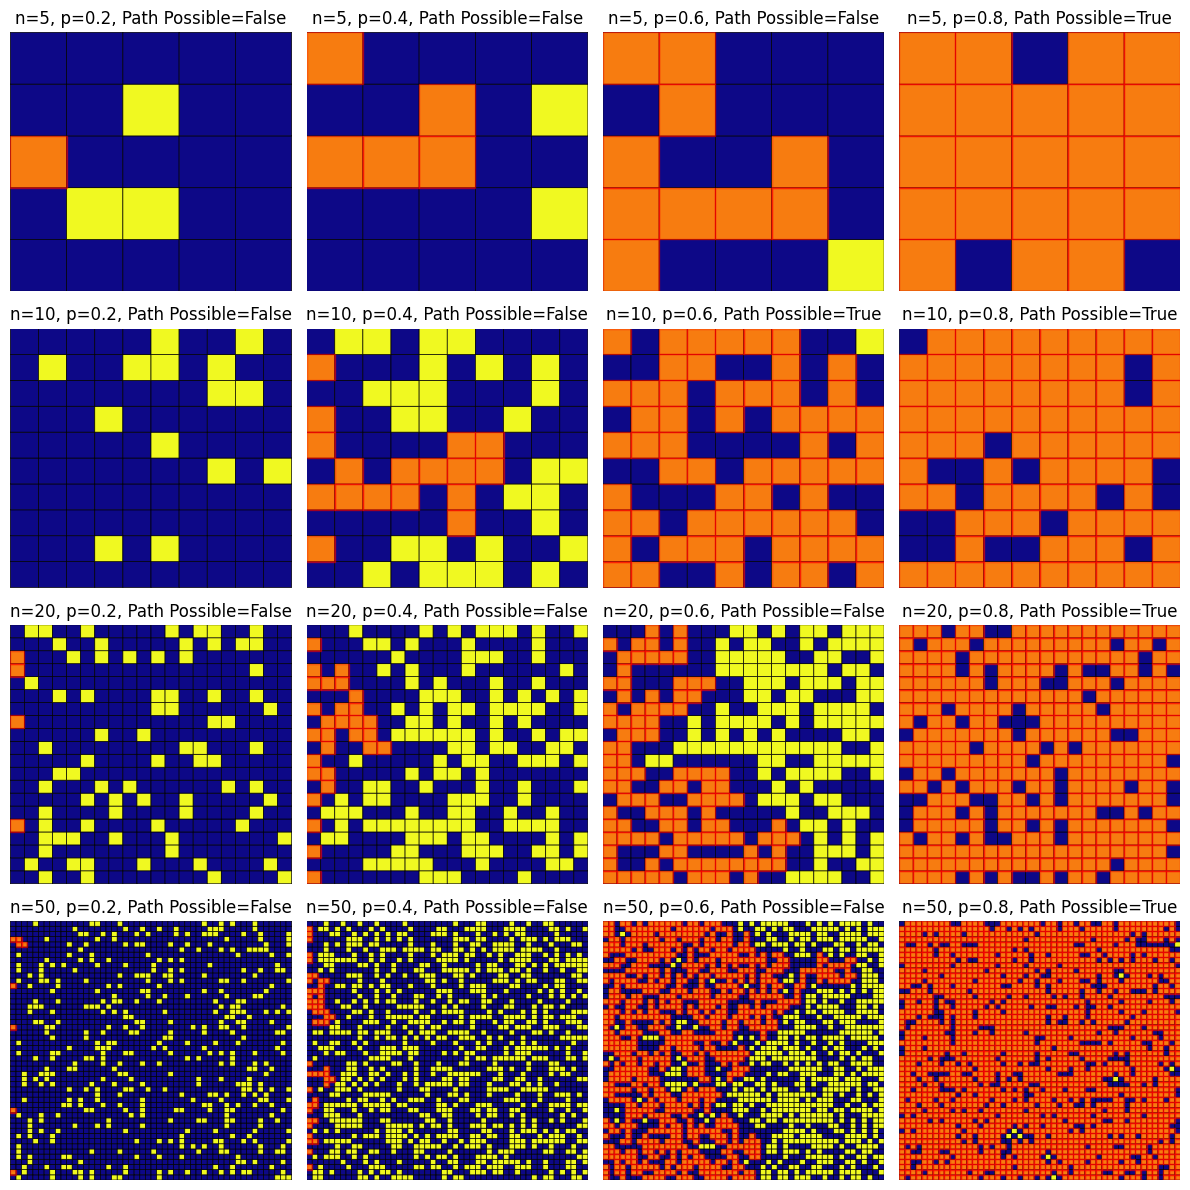

In [18]:
# Example usage and visualization

#defining new n and p values 
n_values = [5, 10, 20, 50]
p_values = [0.2, 0.4, 0.6, 0.8]

#create a subplot grid 

fig, axes = plt.subplots(len(n_values), len(p_values), figsize=(12, 12))

for i, n in enumerate(n_values):  #iterate over each combo of n and p values 
    for j, p in enumerate(p_values):
        grid = generate_grid(n, p) #generate a grid with given size and probability 
        reachable_sites = find_reachable_sites(grid) #find reachable sites in the grid 
        is_possible = dfs(grid)    #check path from left to the right using dfs
        
        axes[i, j].pcolor(grid[::-1], cmap='plasma', edgecolors='k', linewidths=0.5)

        #highlight reachable sites in red 
        for x, y in reachable_sites:
            
            axes[i,j].add_patch(plt.Rectangle((y, n - x - 1), 1, 1, color='red', alpha=0.5))
            
        axes[i, j].set_title(f'n={n}, p={p}, Path Possible={is_possible}') #setting title with grid size, probability and whether or not a path is possible 
        axes[i, j].axis('off') #no need for axes 

plt.tight_layout()
plt.show()

## Task 3

Here we investigate and compare a few new pathfinding algorithms with the depth first search we already have.

Not included here we also tested a random walk algorithm however it was much too slow and innacurate to be useful.

### Breakdown of the A* search algorithm

The A* algorithm is another path finding algorithm which aims to find the fastest path from one side of the grid to the other by assigning each cell a cost and moving between cells with the lowest cost. In our model the cost is distance so the algorithm is attempting to find the most direct route to the other side. Each cells cost $f$ can be expressed as:

$$ f(x,y) = g(x,y) + h(x,y) $$

Where $g$ represents the cost from the start to the cell and $h$ represents an estimate for the cost from the cell to the destination, known as the heuristic. The function $g$ initially begins at 0 for all open cells on the left side of the grid and then whenever a neighbouring cell is checked and moved to 1 is added to $g$ for that cell. This means the $g$ cost of a cell represents the minimum distance from a start cell to that cell. The heuristic cost function $h$ represents a best case scenario estimate for the distance between the current cell and the finish, in this case we just used:

$$ h(x,y) = (length\; of\; grid\; in\; x\; direction) - (x) $$

After the cost of all the starting cells is calculated one is chosen at random to be the start since they all have the same cost. The validity and cost of all neibouring cells is then calculated and stored and a new cell with the lowest cost is moved to while the previously occupied cell is removed from the list of cells available to move to. This process is repeated until either all reachable cells have been checked or a path to the other side is found. The A* algorithm is always guaranteed to find a path to the other side if one exists. Often when A* is used the found path is returned by having each cell store the cell the algorithm moved to before it however we removed this step to cut down on computation and so increase the speed of the algorithm.

In [19]:
#A* Search Algorithm 

# Define the Cell class
# This is used so all the information about a cell can be stored efficiently in a list
# By default it is assumed no cells are reachable and so they are given an infinite cost on initiation
class Cell:
    def __init__(self):
        self.f = float('inf') # Total cost of the cell (g + h)
        self.g = float('inf') # Cost from start to this cell
        self.h = 0 # Heuristic cost from this cell to destination

# Check if a cell is within the bounds of the grid
def is_valid(row, col, ROW, COL):
    return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked
def is_unblocked(grid, row, col):
    return grid[row][col] == 1

# Check if a cell is the destination
def is_destination(col, COL):
    return col == COL - 1  # Check for the last column

# Calculate the heuristic value of a cell (distance to destination)
def calculate_h_value(col, COL):
    return (abs(col - COL))

# Implement the A* search algorithm
# Verbose is used for debugging and is false by default
def a_star_search(grid, verbose = False):

    # Define the size of the grid
    ROW = len(grid)
    COL = len(grid[0])

    # Initialize the closed list (visited cells)
    closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
    # Initialize the details of each cell
    cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]
    # Initialize the open list (cells to visit)
    open_list = []


    #Iterates through the first column checking for valid starting cells
    # If a valid cell is found its cost is calculated and updated and added to the open_list
    for a in range(ROW):

        if is_unblocked(grid,a,0):

            # Initialize the start cell details
            i = a
            j = 0
            cell_details[i][j].f = COL
            cell_details[i][j].g = 0
            cell_details[i][j].h = COL

            # Turn the open list into a heapq object and pushes the start cell to it
            # heapq is an unordered list other than the first item which is always the item with the lowest value
            # This allows the algorithm to very efficiently find the cell with the lowest cost
            heapq.heappush(open_list, (0.0, i, j))

    # Checks there is at least one starting cell for the algorithm to run
    if len(open_list) == 0:
        if verbose == True:
            print("No valid starting cells")
        return False

    # Main loop of A* search algorithm
    # Continues for as long as it takes to find the destination or while there are unsearched cells 
    while len(open_list) > 0:
        # Pop the cell with the smallest cost from the open list
        p = heapq.heappop(open_list)

        # Mark the cell as visited
        i = p[1]
        j = p[2]
        closed_list[i][j] = True

        # Checks all neighbouring cells
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            # If the adjacent cell is valid, unblocked, and not visited
            if is_valid(new_i, new_j, ROW, COL) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
                # If the destination has been reached
                if is_destination(new_j, COL):
                    if verbose == True:
                        print("Destination is reachable")
                        print(closed_list)
                    return True
                else:
                    # Calculate the new cost values
                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_j, COL)
                    f_new = g_new + h_new

                    # If the new cost is less than the cost previously recorded in cell_details
                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
                        # Add the cell to the open list
                        heapq.heappush(open_list, (f_new, new_i, new_j))
                        # Update the cell details
                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new

    # If the destination is not found after visiting all cells return false
    if verbose == True:
        print("Failed to reach the other side")
        print(closed_list)

    return False

### Breakdown of the wall following algorithm

Another algorithm we tried out is a wall following algorithm, this algorithm is modified slightly and used again in part 9. The wall following algorithm we used works by always keeping a wall (or blocked cell in this case) on your left and following it until either the other side of the grid is reached or you return to your starting position. This process is repeated for all cells on the left side of the grid with a blocked cell directly above them as we had you starting out facing in the positive $x$ direction so cells above on the grid are to the left of where you are facing.

In [20]:
# Defines the wall following algorithm
# This is a left wall following algorithm
# Verbose is used for debugging and is false by default
def wall_following(grid, verbose = False):
    # Throughout coordinates are formatted (y,x)
    #This was done because elements of the grid are accessed grid[y][x]
    directions = [np.array((0,-1)),np.array((1,0)),np.array((0,1)),np.array((-1,0))]
    starting_cells = []
    # Surrounds the grid on all sides with a layer of zeroes
    # This is done so that when following a wall on the edge of the graph it doesnt try to check an area outside the graph and return an error
    grid = np.pad(grid, (1,1), 'constant', constant_values = (0))
    if verbose == True:
        print(grid)
    # Valid starting cells are those with an invalid cell directly above them
    # This is the only time the program needs to check for invalid cells as it can figure out where the walls are from just the valid cells after this step
    for a in range(len(grid)):
        if grid[a][1] == 1:
            if grid[a-1][1] == 0:
                starting_cells.append(np.array((a,1)))
    # Runs until either a path to the other side is found or the paths around the walls from all the starting ceells are followed to completion
    while len(starting_cells) > 0:
        starting_pos = starting_cells[0]
        current_pos = starting_cells[0]
        # The algorithm starts facing in the x direction
        directions_index = 2
        repeat = True
        # repeat is only set to false when the path around the wall has been completely followed
        while repeat == True:
            # calculates the position of the cells in front, in front to the left, and to the right
            in_front = directions[directions_index]
            left = directions[(directions_index+1) % 4]
            right = directions[(directions_index-1) % 4]
            y_cell_in_front, x_cell_in_front = current_pos + in_front
            y_cell_in_front_left, x_cell_in_front_left = current_pos + in_front + left
            y_cell_right, x_cell_right = current_pos + right
            if verbose == True:
                print(current_pos)
                print(in_front)
                print(y_cell_in_front, x_cell_in_front)
                print(y_cell_in_front_left, x_cell_in_front_left)
                print(y_cell_right, x_cell_right)
            # When checked in this specific order we know exactly where the wall goes
            # It only works in this order though going from the wall going the  most to the left possible all the way to a complete turn
            # If the cell in front and in front to the left is clear then we know the wall makes a left turn since we know the cell directly to the left is invalid
            if grid[y_cell_in_front][x_cell_in_front] == 1 and grid[y_cell_in_front_left][x_cell_in_front_left] == 1:
                current_pos = y_cell_in_front_left, x_cell_in_front_left
                directions_index = (directions_index + 1) % 4
                if verbose == True:
                    print("left turn!")
            # Otherwise the next possibility is it goes straight
            elif grid[y_cell_in_front][x_cell_in_front] == 1:
                current_pos = y_cell_in_front, x_cell_in_front
                if verbose == True:
                    print("straight ahead!")
            # The next possibility is the wall turns right
            elif grid[y_cell_right][x_cell_right] == 1:
                directions_index = (directions_index - 1) % 4
                if verbose == True:
                    print("go right")
            # If none of the other options happen then the wall must go back on itself
            else:
                directions_index = (directions_index + 2) % 4
                if verbose == True:
                    print("turn around!")
            if verbose == True:
                print(directions[directions_index])
            # If we are back at the beggining and facing any direction other than right then we must have gone around the entire path made by the wall
            # We can now exit the loop and remove the starting cell from the list of starting cells to try
            if (current_pos == starting_pos).all() and directions_index != 1:
                if verbose == True:
                    print("back to start")
                repeat = False
            # Checks if the destination has been reached
            elif current_pos[1] == len(grid[0])-2:
                return True
        starting_cells.remove(starting_pos)
    return False

### Breakdown of breadth first search algorithm

The breadth first algorithm (BFS) works as follows:

1) Initialise an empty set to keep track of visited sets
2) Place the first column into the queue and then mark all the squares as visited
3) We then check each adjacent square to see if it is in bounds, unvisited or yellow
4) If the square is unvisited and yellow we add it to the visited set
5) We keep repeating this process until we reach a square on the right side

This algorithm is very slow as it explores every reachable cell column by column before reaching the end. This makes it inferior to dfs and A* in this application as they normally can reach the other side without exploring all reachable cells

Breadth first searches are usually used when it is not known how far away the goal is from the start as in this scenario other algorithms can overshoot and miss the goal entirely whereas bfs is guaranteed to find it. However, in percolation it is not an efficient algorithm to use since we know how far the goal is away so it is much faster to use algorithms which prioritise moving towards the goal such as DFS or A*.

In [21]:
def bfs(grid):
    n = len(grid)
    visited = set()  # Set to track visited sites
    queue = deque([(0, j) for j in range(n) if grid[j][0] == 1])  # Initialize queue with yellow sites in the first row

    while queue:
        i, j = queue.popleft()
        visited.add((i, j))  # Mark site as visited
        
        if i == n - 1:  # Check if reached the right side
            return True  # Yellow path found
        
        # Explore neighboring sites
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        for ni, nj in neighbors:
            # Check if neighbor is within bounds, unvisited, and yellow
            if 0 <= ni < n and 0 <= nj < n and (ni, nj) not in visited and grid[nj][ni] == 1:
                queue.append((ni, nj))
    return False  # No yellow path found

In [15]:
# Checking all the algorithms give the same results

a_star_true = 0
dfs_true = 0
wall_following_true = 0
bfs_true = 0

for a in range(10000):
    grid = generate_grid(10,0.6)
    if a_star_search(grid) == True:
        a_star_true += 1
    if dfs(grid) == True:
        dfs_true += 1
    if wall_following(grid) == True:
        wall_following_true += 1
    if bfs(grid) == True:
        bfs_true += 1

print(a_star_true)
print(dfs_true)
print(wall_following_true)
print(bfs_true)

5618
5618
5618
5618


Below we compare the speed of the different algorithms.

As expected BFS is the slowest since it fully explores each column before moving on to the next. This means that it spends a lot of time exploring redundant pathways rather than prioritising paths to the goal.

The next slowest is the wall following algorithm, I think this performs worse than A* or DFS since for each movement between cells lots more calculations and checks are carried out to see which way to travel. Also, on grid with $p$ close to the critical value like we used for testing there are often many long branching paths that finish in dead ends which take a long time to explore and which other algorithms such as A* might not travel down due to their high cost. The speed and number of cells needed to be explored to find the goal for the wall following algorithm is analysed further in part 9.

The fastest algorithms are DFS and A* both of which are basically the same speed. In other applications you would usually expect A* to be the faster algorithm however that is not the case here. There may be a few possible reasons for that:

1) __A*'s heuristic__ - The A* algorithm performs better the more specific its heuristic function is as the more specific it is the more options can be eliminated, here the heuritic function is very simple meaning many paths have the same cost and all need to be explored

2) __DFS is very computationally efficient__ - The DFS algorithm we have used carries out comparitively few checks and calculations compared to the A* algorithm which could increase its speed, especially for larger grids

3) __A* stores a lot more information__ - A* is slowed down by the creation of two arrays the same size as the grid which store all the information about the cost and validity of each cell in the grid. This takes time to create and edit which will slow it down compared to DFS which only uses a single set to store the coordinates of the cells it has visited

In [12]:
# Timing nthe different algorithms to compare efficiency

time_dfs = 0
time_wall = 0
time_a_star = 0
time_bfs = 0

start_1 = time.time()

for a in range(1000):
    grid = generate_grid(30, 0.6)
    start_1 = time.time()
    dfs(grid)
    end_1 = time.time()
    time_dfs += end_1 - start_1
    start_2 = time.time()
    wall_following(grid)
    end_2 = time.time()
    time_wall += end_2 - start_2
    start_3 = time.time()
    dfs(grid)
    end_3 = time.time()
    time_a_star += end_3 - start_3
    start_4 = time.time()
    bfs(grid)
    end_4 = time.time()
    time_bfs+= end_4 - start_4

print(time_dfs)
print(time_wall)
print(time_a_star)
print(time_bfs)

1.3245437145233154
3.9709293842315674
1.2230947017669678
334.0218608379364


## Task 4

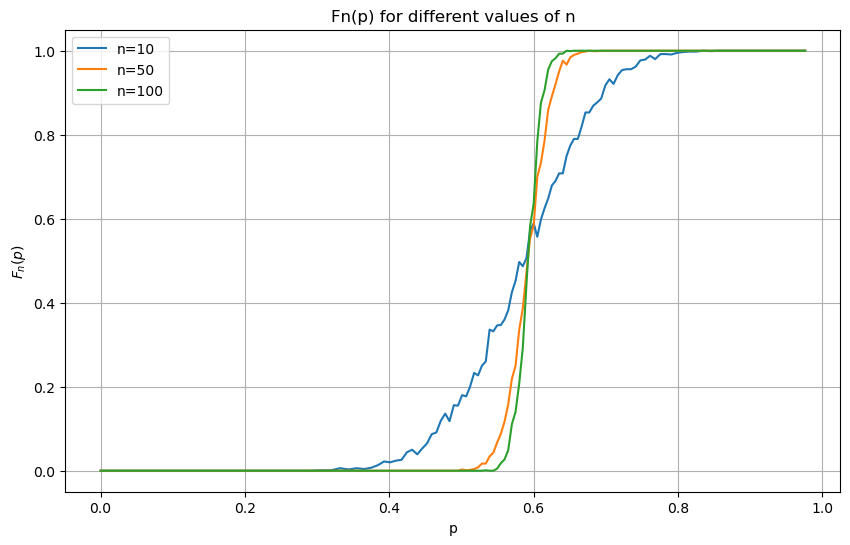

In [16]:
# This cell does the same as the cell above but with the p_values distributed normally around 0.6

# numtrials=100, max value of n_values is 100, 101 values of p -> 10 minutes

# Function to compute Fn(p)
def compute_Fn(n, p, num_trials=1000):
    count = 0
    for _ in range(num_trials):
        grid = generate_grid(n, p)
        if a_star_search(grid):
            count += 1
    return count / num_trials

n_values = [10, 50, 100] # sets the grid size to 10x10, 50x50, 100x100

x = np.linspace(0, 1, 100, endpoint = False)[1:] #creates 100 values of p between 0 and 1

p_values = norm.ppf(x, loc = 0.5, scale = 0.2) + 0.1

# Loop through each value in p_values. If 'a' is greater than 1, remove it from p_values.
for a in p_values:
    if a > 1:
        p_values = np.delete(p_values, np.where(p_values == a))
p_values = np.insert(p_values,0,0.07)
p_values = np.insert(p_values,0,0)

# Compute Fn(p) for each n and p
Fn_values = np.zeros((len(n_values), len(p_values)))
for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        Fn_values[i, j] = compute_Fn(n, p)

# Plot Fn(p) for each n
plt.figure(figsize=(10, 6))
for i, n in enumerate(n_values):
    plt.plot(p_values, Fn_values[i], label=f'n={n}')
plt.xlabel('p')
plt.ylabel('$F_{n}(p)$')
plt.title('Fn(p) for different values of n')
plt.legend()
plt.grid(True)
plt.savefig('Fn_plot.png')
plt.show()

As $n$ increases, the critical point $p_{c}$ becomes more apparent, where the likelihood of a path existing jumps from zero to almost certain. 

This can be intuited, albeit not rigorously proven, by considering the larger grid as a collection of smaller grids. Since there are numerous grids within the larger one, on average, we would expect to find at least one grid connecting the left compartment to those in-between and then to the right compartment when $p>p_{c}$.

In [43]:
def compute_Fn(n, p, num_trials=1000):
    count = 0
    for _ in range(num_trials):
        grid = generate_grid(n, p)
        if a_star_search(grid):
            count += 1
    return count / num_trials

# Define the lower and upper bounds
lower_bound = 0.58
upper_bound = 0.6

# Compute F(n) for n = 200 within the specified range
while upper_bound - lower_bound > 1e-6:
            mid_point = (lower_bound + upper_bound) / 2
            if compute_Fn(200, mid_point) > 0.5:
                upper_bound = mid_point
            else:
                lower_bound = mid_point
        
print(lower_bound)

# Print critical point

0.5927349853515625


Our calculated value is $p_{c}=0.5927$ correct to 4 s.f., this value is consistent with [1] as their paper found $p_{c} = 0.59274621$ to 8 significant figures.

## Task 5

1) simple matrix visualisation of a 2n by n grid 
2) turning this into a matplotlib format grid 
3) applying a reachable path finder algorithm for small grids of different sizes 

In [51]:
#Just making sure we can create a small rectangle with matrix output ... 
#This is just to help with intuition and since we did the same with squares. 
import numpy as np

def generate_rectangle_grid(m, n, p):
    return np.random.choice([1, 0], size=(m, n), p=[p, 1-p])

rectangular_grid = generate_rectangle_grid(5, 7, 0.6)

# Print the grid
for row in rectangular_grid:
    print(' '.join('Y' if cell == 1 else 'B' for cell in row))

B Y B B Y B Y
Y B Y Y Y Y B
B Y B B B Y Y
Y B B B Y B Y
Y Y Y B B Y Y


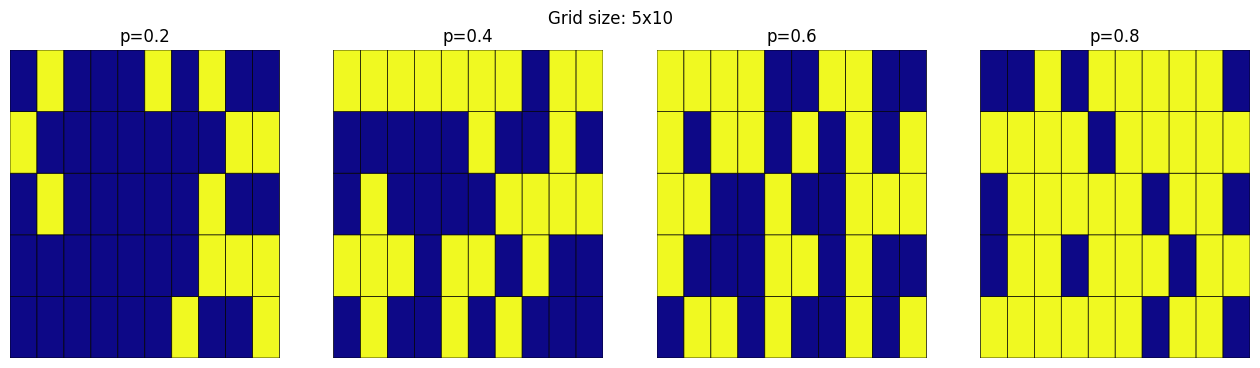

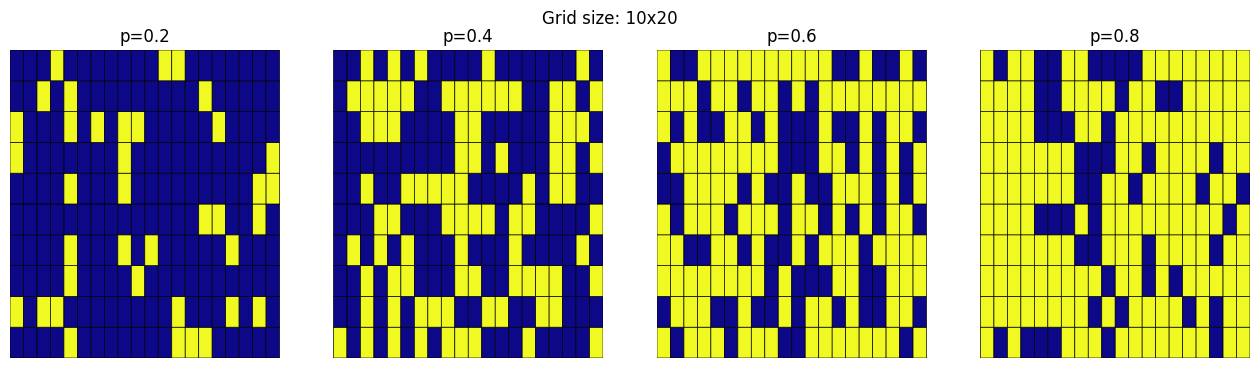

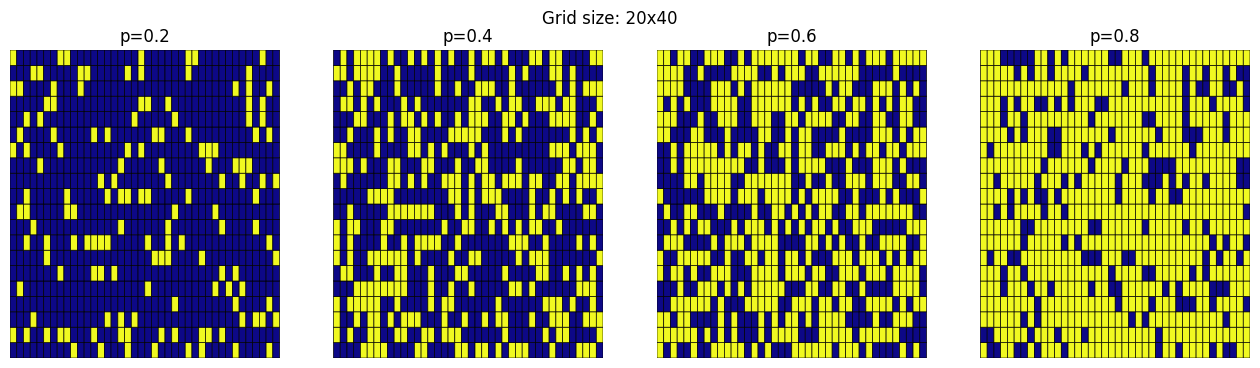

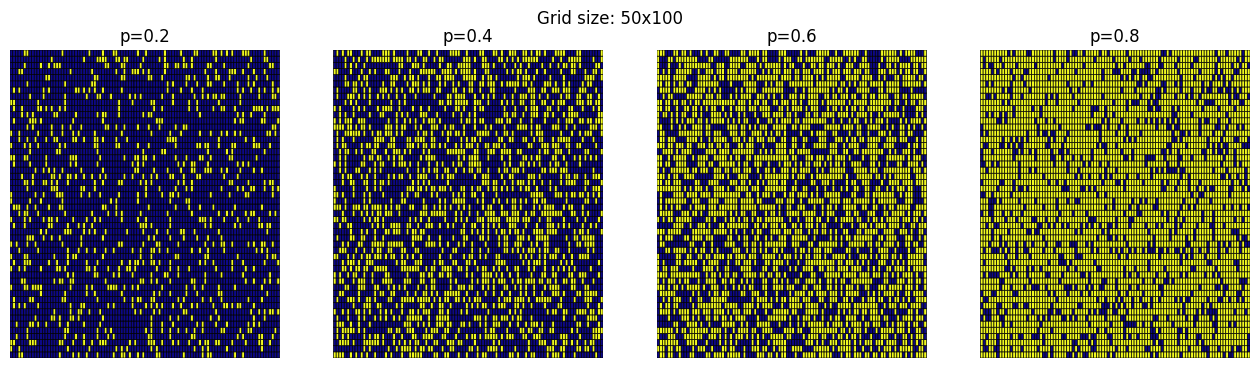

In [56]:
#Now extending this for proper grids 

#just adding rows and cols to the normal square grid 
def generate_rectangle_grid(rows, cols, p):
    return np.random.choice([1, 0], size=(rows, cols), p=[p, 1-p])

#defining values,.. n and 2n 
rows_values = [5, 10, 20, 50, 100]
cols_values = [10, 20, 40, 100]
p_values = [0.2, 0.4, 0.6, 0.8]

#iterate over min len of rows and cloumns 
for i in range(min(len(rows_values), len(cols_values))):
    rows = rows_values[i]
    cols = cols_values[i]
    #create subplots similarly 
    fig, axs = plt.subplots(1, len(p_values), figsize=(len(p_values)*4, 4))
    for j, p in enumerate(p_values):
        #make a rectangle grid with given dimensions and p 
        grid = generate_rectangle_grid(rows, cols, p)
        title = f"p={p}"   #generate title for the subplot 
        if len(p_values) > 1:
            plot_grid(grid, axs[j], title)
        else:
            plot_grid(grid, axs, title)
    fig.suptitle(f"Grid size: {rows}x{cols}") #change title to include rows and columns 
    plt.show()

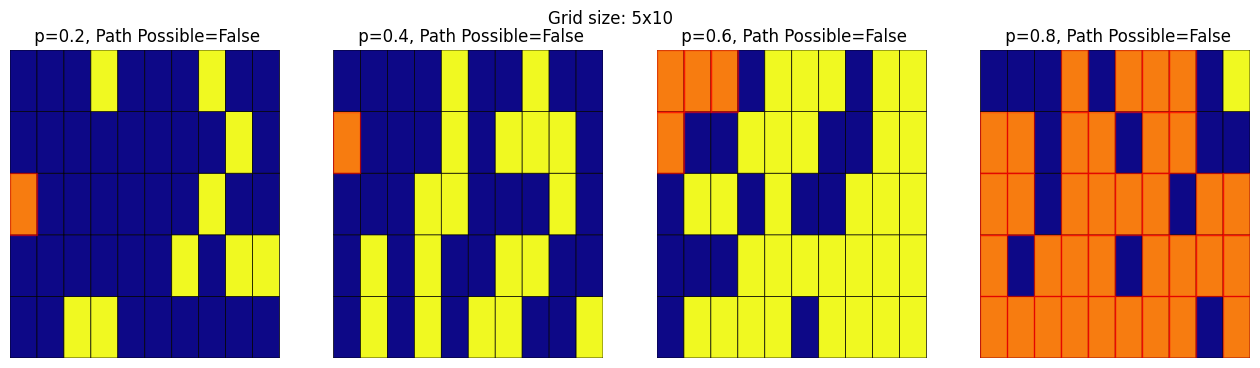

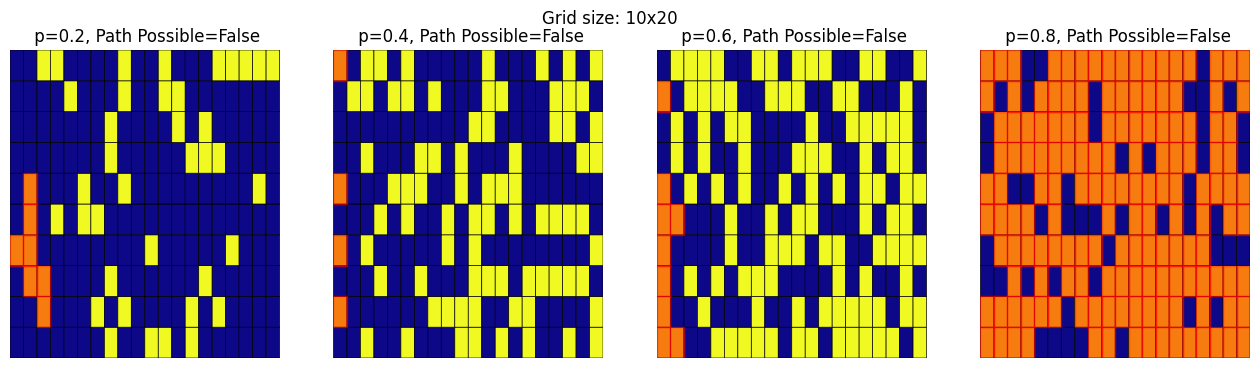

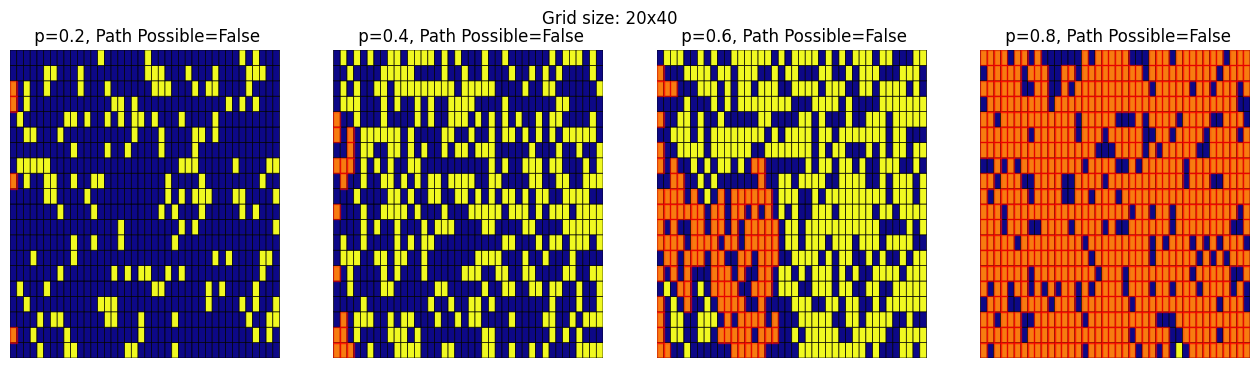

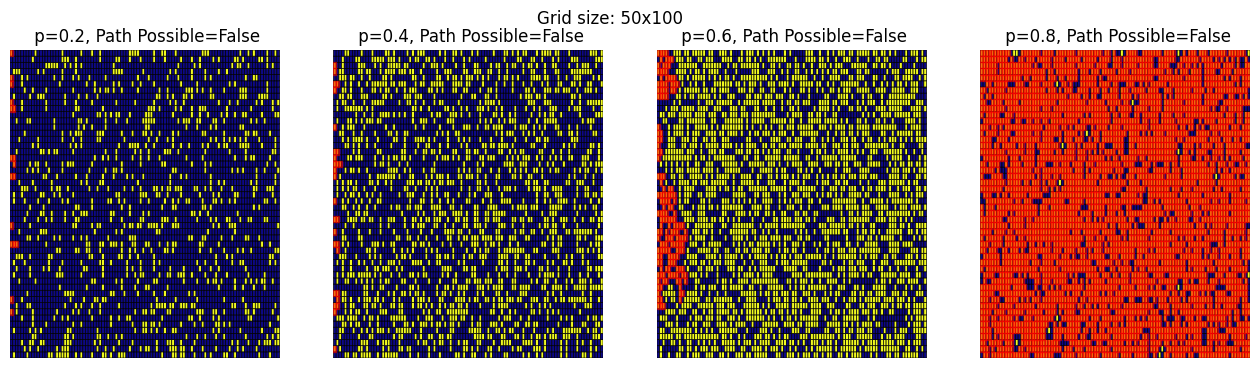

In [57]:

#now adapt the reachable function to work for the rectangles 

def plot_grid_with_reachable_rectangle(grid, reachable, ax, title):
    ax.pcolor(grid[::-1], cmap='plasma', edgecolors='k', linewidths=0.5)
    for i, j in reachable:
        ax.add_patch(plt.Rectangle((j, grid.shape[0] - i - 1), 1, 1, color='red', alpha=0.5))
    ax.set_title(title)
    ax.axis('off')


#define values for rows and make sure p values defined again 
visited = set()    
rows_values = [5, 10, 20, 50]
p_values = [0.2, 0.4, 0.6, 0.8]


#now adapting the code but ensuring the columns are 2x the row size 
for rows in rows_values:
    cols = 2 * rows
    fig, axs = plt.subplots(1, len(p_values), figsize=(len(p_values)*4, 4))
    for j, p in enumerate(p_values):
        grid = generate_rectangle_grid(rows, cols, p)
        reachable_sites = find_reachable_sites(grid)  
        is_possible = is_path_possible_old(grid,p)  
        title = f" p={p}, Path Possible={is_possible}"
        plot_grid_with_reachable_rectangle(grid, reachable_sites, axs[j], title)
    fig.suptitle(f"Grid size: {rows}x{cols}")
    plt.show()

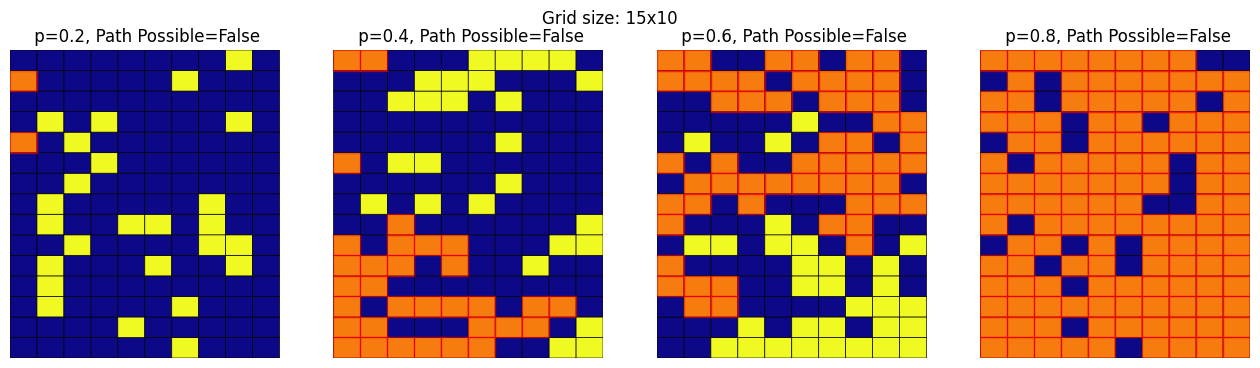

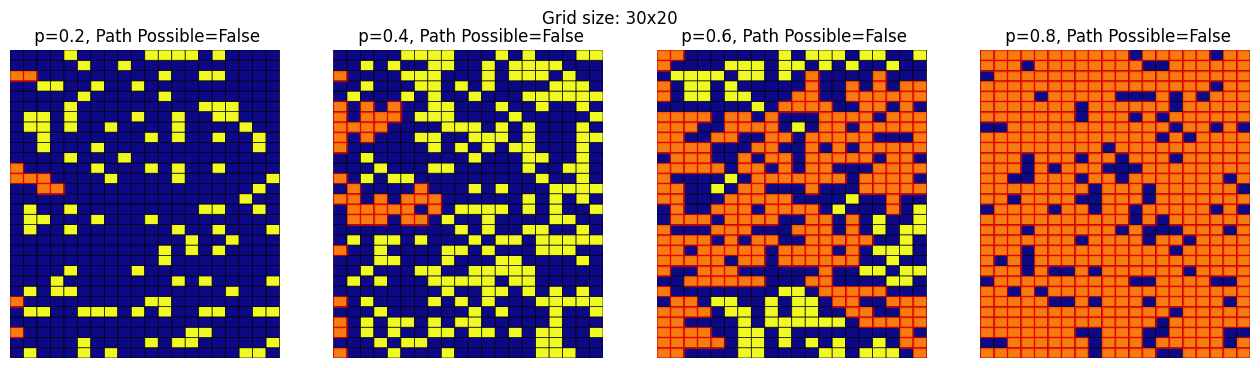

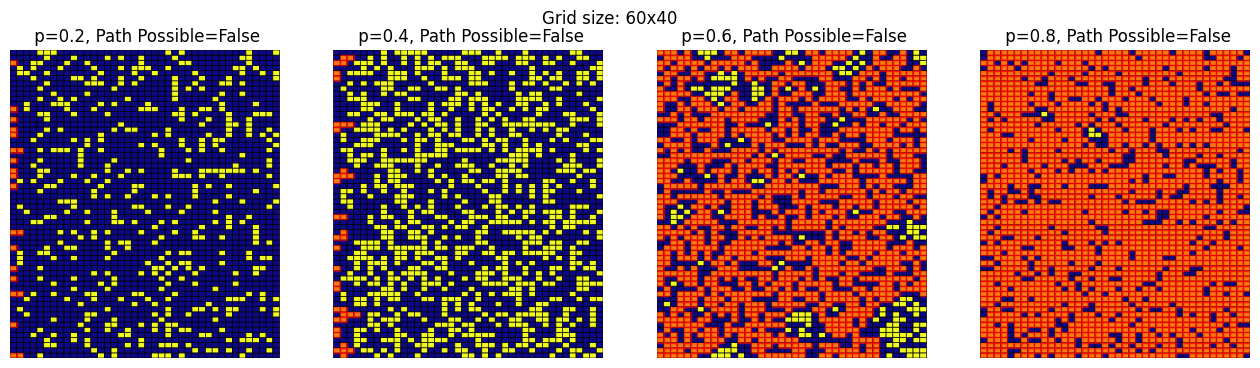

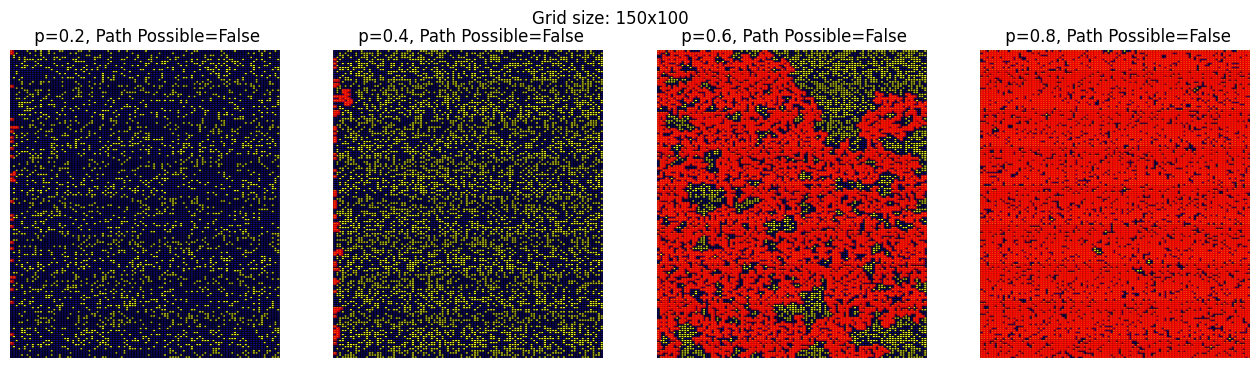

In [58]:
#This does the same but makes the cols to rows ratio 2:3

for rows in rows_values:
    cols = 2 * rows
    fig, axs = plt.subplots(1, len(p_values), figsize=(len(p_values)*4, 4))
    for j, p in enumerate(p_values):
        grid = generate_rectangle_grid(3 * rows, cols, p)
        reachable_sites = find_reachable_sites(grid)  
        is_possible = is_path_possible_old(grid,p)  
        title = f" p={p}, Path Possible={is_possible}"
        plot_grid_with_reachable_rectangle(grid, reachable_sites, axs[j], title)
    fig.suptitle(f"Grid size: {3 * rows}x{cols}")
    plt.show()

Mathematically, we would expect the 2n by n and 3n by 2n grids to have the same critical value as n by n simply because there are 4 options from each grid to get to the next in each case. This would change for different lattices eg a triangle! In our case, as n tends to infinity, both n by n and n by 2n and 3n by 2n span R2 thus the question of whether there is a path left to right in 2n by n  (or n by n or any other size) becomes the question of will there be a path from left to right in R2 which all have the same critical value. 

## Task 6

In [22]:
# Function to determine if a yellow path is possible from the center of the grid to its boundary
def is_path_possible_from_center(grid):

    # Get the size of the grid
    n = len(grid)
    # Calculate the index of the center cell
    center = n // 2

    # Check if the center cell is yellow (1), if not, return False
    if grid[center, center] == 0:
        return False
    
    # Initialise a stack to store cells to be explored
    stack = [(center, center)]
    # Initialise a set to keep track of visited cells
    visited = set()

    # Perform depth-first search to explore cells
    while stack:
        x, y = stack.pop()
        visited.add((x, y))

        # Check if the current cell is at any boundary of the grid
        if x == 0 or x == n - 1 or y == 0 or y == n - 1:
            return True

        # Check adjacent cells
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            nx, ny = x + dx, y + dy
            # Check if the adjacent cell is within the grid, not visited, and yellow
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited and grid[nx, ny] == 1:
                stack.append((nx, ny))

    # If no path is found, return False
    return False


### Function: `is_path_possible_from_center`

This function determines whether there is a path of yellow cells from the central cell of a grid to any of its boundaries. It starts by locating the central cell of the grid. If this central cell is a blue cell, it immediately concludes that no path is possible. Otherwise, it begins exploring neighbouring cells using a depth-first search algorithm.

The function maintains a stack to keep track of cells to visit and a set to store visited cells, ensuring it doesn't revisit the same cell multiple times. It iterates through neighbouring cells, checking if they are within the grid boundaries, unvisited, and are a yellow cell. If such a cell is found, it is added to the stack for further exploration.

The process continues until either a boundary cell is reached, indicating a successful path, or all possible paths are exhausted, indicating no viable path exists. This function efficiently navigates through the grid, allowing for quick determination of path feasibility.

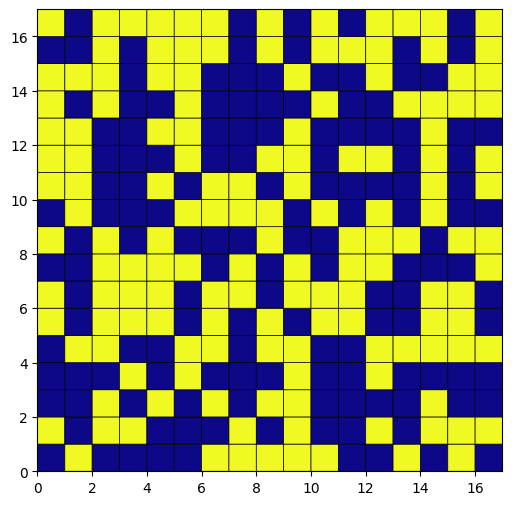

Is there a yellow path connecting the centre of the grid to the boundary? False


In [23]:
# Generate a random odd integer between 10 and 30
random_odd_integer = random.choice([num for num in range(10, 31) if num % 2 != 0])

# Define the probability p value
p = 0.5

# Generate a grid with the specified random odd integer size and probability p
grid = generate_grid(random_odd_integer, p)

# Visualise the generated grid
visualise_grid(grid)

# Check if there is a yellow path connecting the centre of the grid to the boundary
print("Is there a yellow path connecting the centre of the grid to the boundary? " + str(is_path_possible_from_center(grid)))


### Simulation for a random nxn grid

This cell creates an odd grid, to test our function and we can see the usage of the `is_path_possible_from_center` function.

As we can see, the function correctly determines whether a path is possible from the center of the random grid

This code defines a function compute_Gn that computes the probability of a path being possible from the centre to the boundary of a grid of size n with obstacle probability p. It runs a specified number of trials `num_trials` to estimate this probability.

The code then computes $G_{n}(p)$ for different values of n and p, storing the results in an array Gn_values, and plots the results for each n using Matplotlib. Finally, it saves the plot as an image named `Gn_plot.png`.

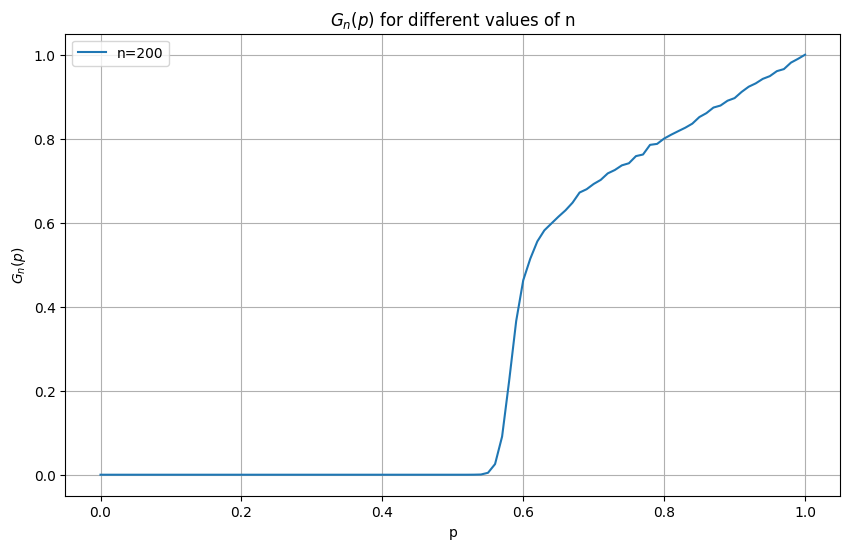

Our first inflection point is at: 0.58


In [38]:
# Function to compute G_n(p)
def compute_Gn(n, p, num_trials=10000):
    count = 0
    for _ in range(num_trials):
        grid = generate_grid(n, p)
        if is_path_possible_from_center(grid):
            count += 1
    return count / num_trials

n_values = [200] #Set the grid size to 200x200
p_values = np.linspace(0, 1, 101)  # 101 values between 0 and 1

# Compute Gn(p) for each n and p
Gn_values = np.zeros((len(n_values), len(p_values)))  # Initialise array to store Gn values
for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        Gn_values[i, j] = compute_Gn(n, p)  # Compute Gn(p) for each n and p

# Plot Gn(p) for each n
plt.figure(figsize=(10, 6))  # Set figure size
for i, n in enumerate(n_values):
    plt.plot(p_values, Gn_values[i], label=f'n={n}')  # Plot Gn(p) for each n
plt.xlabel('p')  # Label x-axis
plt.ylabel('$G_{n}(p)$')  # Label y-axis
plt.title('$G_{n}(p)$ for different values of n')  # Set title
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.savefig('Gn_plot.png') #Save the polt as Gn_plot.png
plt.show()  # Display plot

# Find inflection points
second_derivative = np.gradient(np.gradient(Gn_values, axis=1), axis=1)
inflection_points = []
for j in range(len(p_values) - 2):
    if np.sign(second_derivative[0, j]) > 0 and np.sign(second_derivative[0, j + 1]) < 0:
        inflection_points.append(p_values[j])

print( "Our first inflection point is at: " + str( inflection_points[0] ) )

Since our first inflection point is found to be around 0.58 for n=200, then we will use the lower and upper bounds of 0.58 and 0.6 respectively to find the critical point.

As $\lim_{{n \to \infty}}$ , the function $G_{n}(p)$ is zero until it reaches the point $p=0.58$. After $0.58$, $G_{n}(p)$ drastically increases until it hits the value of roughly $G_{n}(p)=0.58$, and then roughly follows the function $y=x$ until it hits the point $(1,1)$.

This can be informally demonstrated by considering the probability that only the singular center square is yellow or blue for $p>p_{c}$. For instance, if our $p$ value is 0.7, we would expect to find a path from the center to the boundary 0.7 of the time (if n is very very large). This implies that $G_{n}(p)$ converges to the probability that the center square is yellow for $p > p_{c}$ (for very large n). Essentially, if we find ourselves spawned onto a yellow square, it becomes almost certain that we will be able to reach the boundary, as opposed to Task 4 where our movement options were limited due to fewer possible avenues to explore (i.e., up, right, left, or down).

In [44]:
def find_critical_point():
    # Define the tolerance for convergence
    tolerance = 0.0001
    
    # Define the range to search for the critical point
    lower_bound = 0.58
    upper_bound = 0.6
    
    # Initialise the mid-point
    mid_point = (lower_bound + upper_bound) / 2
    
    # Perform bisection search
    while upper_bound - lower_bound > tolerance:
        mid_point = (lower_bound + upper_bound) / 2
        
        # Evaluate G(mid_point)
        Gn_mid_point = compute_Gn(200, mid_point)
        
        # Determine which half to search next
        if Gn_mid_point < 0.25:
            lower_bound = mid_point
        else:
            upper_bound = mid_point
    
    return mid_point

# Find the critical point
critical_point = find_critical_point()
print("Critical point:", critical_point)

Critical point: 0.5819531250000001


This function `find_critical_point` calculates $p_{c}\approx 0.58$.

Therefore, as $\lim_{{n \to \infty}}$ when $p>0.58$, we would expect there to be a yellow path from the center to the border p proportion of the time.

## Task 9

In this section we explore the boundary between reachable and unreachable sites. The code below shows a visualisation of boundaries that are reachable. Note that a wall following algorithm will be able to reach all the same areas as any other pathfinding algorithm.

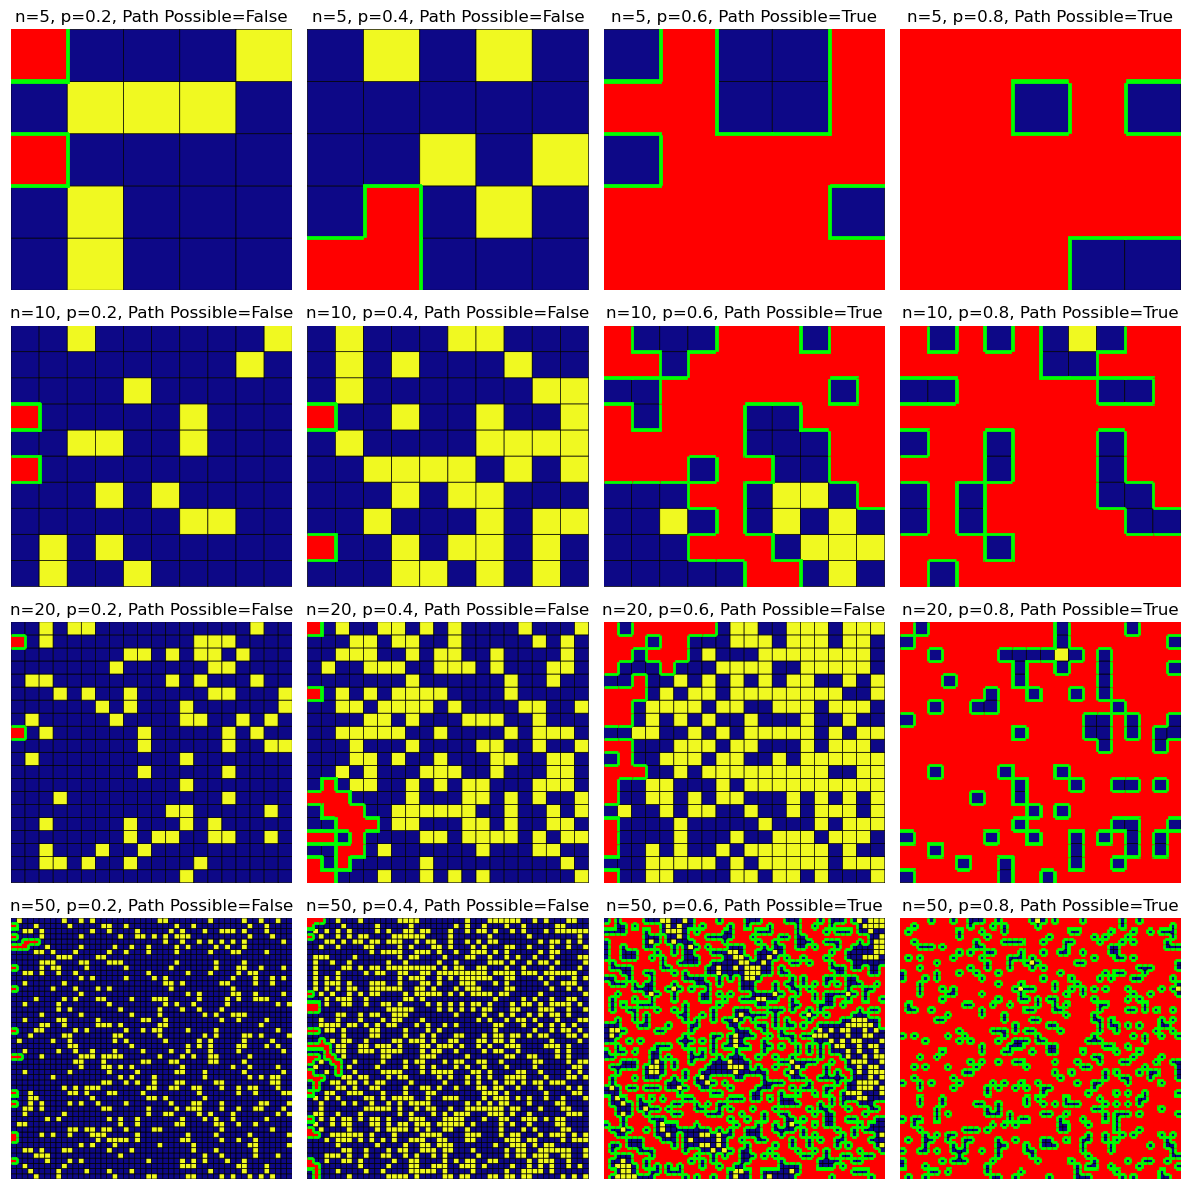

In [ ]:
def drawBoundary(x, y, i, j, axes, reachable_sites):
    """
    Function to draw boundaries around unreachable sites in the grid.

    Parameters:
        x: x coordinates.
        y: y coordinates.
        i: Row index.
        j: Column index. 
        axes-
        reachable_sites: A list of reachable sites in the grid.

    """
    # Find the dimensions of the grid
    m, n = grid.shape
    
    # iterate over the neighboring cells
    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        # finding the coordinates of the neighboring cells
        nx, ny = x + dx, y + dy
        # checking if the neighboring cell is within the grid boundaries and is not reachable
        if 0 <= nx < m and 0 <= ny < n and (nx, ny) not in reachable_sites:
            # drawing the boundary in lime depending on direction. adapting position to create left, right, top and bottom lines
            if (dy == 1 and dx == 0): # right
                boundary = plt.Rectangle((ny, n-nx-1), 0.02, 1, edgecolor='lime', facecolor='none', linewidth=2)
            elif (dy == 0 and dx == 1): # top
                boundary = plt.Rectangle((ny, n-nx), 1, 0.02, edgecolor='lime', facecolor='none', linewidth=2)
            elif (dy == 0 and dx == -1): # bottom
                boundary = plt.Rectangle((ny, n-nx-1), 1, 0.02, edgecolor='lime', facecolor='none', linewidth=2)
            elif (dy == -1 and dx == 0): # left
                boundary = plt.Rectangle((ny+1, n-nx-1), 0.02, 1, edgecolor='lime', facecolor='none', linewidth=2)
            # then we add the boundary to the subplot
            axes[i, j].add_patch(boundary)

#example usage and visualization
n_values = [5, 10, 20, 50]
p_values = [0.2, 0.4, 0.6, 0.8]

#creating subplots for visualization
fig, axes = plt.subplots(len(n_values), len(p_values), figsize=(12, 12))

#then use the same code, but with draw boundary used as well! 
for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        grid = generate_grid(n, p)
        reachable_sites = find_reachable_sites(grid)
        is_possible = dfs(grid)
        
        axes[i, j].pcolor(grid[::-1], cmap='plasma', edgecolors='k', linewidths=0.5)
        for x, y in reachable_sites:
            axes[i,j].add_patch(plt.Rectangle((y, n - x - 1), 1, 1, color='red', alpha=1))
            drawBoundary(x, y, i, j, axes, reachable_sites)
        axes[i, j].set_title(f'n={n}, p={p}, Path Possible={is_possible}')
        axes[i, j].axis('off')  

#this will then show the lime boundaries on the graph 
plt.tight_layout()
plt.show()

Below is a modified version of the wall following algorithm. It is exactly the same except it returns how many cells it had to explore before the algorithm terminated. We will use this to explore what percentage of sites need to be explored for an $n\times n$ grid with probability $p$ of a cell being yellow.

In [17]:
#This is the same function as the function wall_following other than it now doesn't return if a path is possible or not, only how many sites it visited
def wall_following_ratio(grid):
    directions = [np.array((0,-1)),np.array((1,0)),np.array((0,1)),np.array((-1,0))]
    starting_cells = []
    grid = np.pad(grid, (1,1), 'constant', constant_values = (0))
    # Initiating number of cells visited
    cells_visited = 0
    for a in range(len(grid)):
        if grid[a][1] == 1:
            if grid[a-1][1] == 0:
                starting_cells.append(np.array((a,1)))
    while len(starting_cells) > 0:
        starting_pos = starting_cells[0]
        current_pos = starting_cells[0]
        directions_index = 2
        repeat = True
        while repeat == True:
            in_front = directions[directions_index]
            left = directions[(directions_index+1) % 4]
            right = directions[(directions_index-1) % 4]
            y_cell_in_front, x_cell_in_front = current_pos + in_front
            y_cell_in_front_left, x_cell_in_front_left = current_pos + in_front + left
            y_cell_right, x_cell_right = current_pos + right
            # Turn left
            if grid[y_cell_in_front][x_cell_in_front] == 1 and grid[y_cell_in_front_left][x_cell_in_front_left] == 1:
                current_pos = y_cell_in_front_left, x_cell_in_front_left
                directions_index = (directions_index + 1) % 4
                # If it makes a left turn then it visits two cells
                cells_visited += 2
            # Straight ahead
            elif grid[y_cell_in_front][x_cell_in_front] == 1:
                current_pos = y_cell_in_front, x_cell_in_front
                # If it goes straight ahead it visits one cell
                cells_visited += 1
            # If it turns right or turns around it doesnt leave the cell it is currently in and so visits no extra cells
            # Turn right
            elif grid[y_cell_right][x_cell_right]:
                directions_index = (directions_index - 1) % 4
            # Turn around
            else:
                directions_index = (directions_index + 2) % 4
            if (current_pos == starting_pos).all() and directions_index != 1:
                repeat = False
            elif current_pos[1] == len(grid[0])-2:
                return cells_visited
        starting_cells.remove(starting_pos)
    return cells_visited

The code below calculates and plots the fraction of the grid that needs to be explored before the wall following algorithm terminates for various values of $n$ and $p$.

As you can see from the results there is a large spike in the fraction of the grid that needs to be explored around the critical value with almost all of the reachable sites needing to be explored for large grids. This is probably because when close to the critical value almost all of the grid is reachable and most reachable cells border an unreachable cell meaning they will be traversed through by the wall following algorithm. This is unlike higher p values where although basically all cells are reachable, there are large areas of reachable cells with no neighbouring unreachable cells which will never be traversed through. Very low p values require a small amount of cells to be traversed through since most of the time very few sites are reachable.

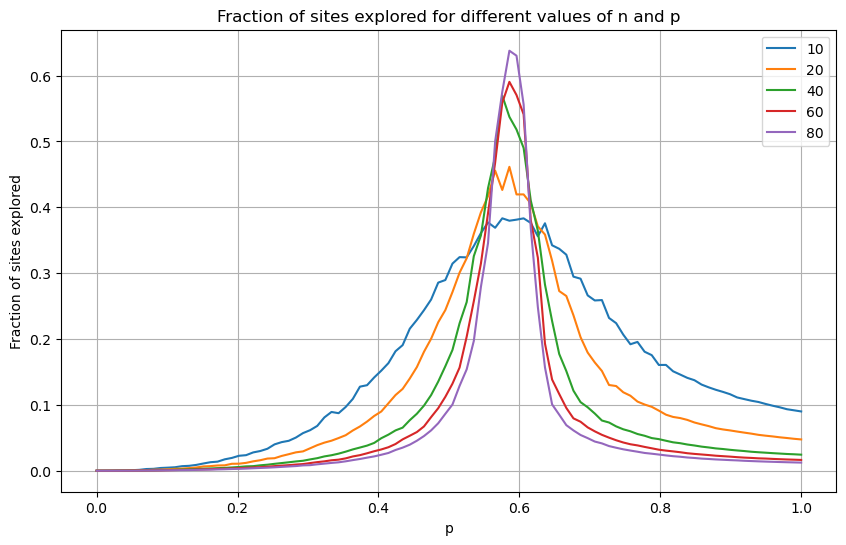

In [20]:
# computes the ratio for each n and p by generating a grid and running the wall_following_ratio function
# This happens 1000 times and then the results are averaged
def compute_ratio(n, p, num_trials=1000):
    count = 0
    for _ in range(num_trials):
        grid = generate_grid(n, p)
        count += wall_following_ratio(grid) / (n**2)
    return count / num_trials

# The list n_values are the sizes of the nxn grids that will be tested and plotted
n_values = [10,20,40,60,80]

#generates 100 values equally distributed between 0 and 1 for the probability p of a cell being yellow
p_values = np.linspace(0, 1, 100)

# Creates an array to store the ratio values for each n value and p value
ratio_values = np.zeros((len(n_values), len(p_values)))

# Iterates through all the n values and p values and calcuates the ratio
for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        ratio_values[i, j] = compute_ratio(n, p)

# Plots and saves the graph
plt.figure(figsize=(10, 6))
for i, n in enumerate(n_values):
    plt.plot(p_values, ratio_values[i], label = n)
plt.xlabel('p')
plt.ylabel('Fraction of sites explored')
plt.title('Fraction of sites explored for different values of n and p')
plt.legend()
plt.grid(True)
plt.show()

## Task 10

For Question 10, we reuse the same A* algorithm from part 3.

We generate our grid slightly differently, assigning each grid coordinate a random uniform [0,1] variable. We also have modified the dfs to instead of checking if a cell has value 0 or 1 instead checking if it has value less than or equal to p. This ensures there is probability p of a cell being unblocked. To try and find a critical point, we loop the code for each p value starting at 0.5 and increasing slowly until a value is found. We then carry out this process over multiple iterations and calculate the average value of all the iterations

This method is faster and more accurate than the method we used earlier.


In [24]:
def generate_random_uniform_grid(n):
    # Generate a grid of size n x n with independent Uniform[0,1] random variables for each site
    return np.random.rand(n, n)

In [25]:

# This is the same as the dfs function defined earlier apart from it now takes p as a parameter and checks if a cell is less than or equal to p
def dfs_crit_point(grid,p):
    m, n = grid.shape
    
    def is_path_possible(x, y):
        if y == n - 1:  # Reached the rightmost column
            return True

        visited.add((x, y))

        # Check adjacent cells
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < m and 0 <= ny < n and (nx, ny) not in visited and grid[nx, ny] <= p:
                if is_path_possible(nx, ny):
                    return True

        return False

    for i in range(m):
        if grid[i, 0] <= p:
            visited = set()
            if is_path_possible(i, 0):
                return True
    
    return False

In [26]:
def find_critical_point(n, num_simulations, increment):
    p_values = []
    for i in range(num_simulations):
        grid = generate_random_uniform_grid(n)
        p = 0.5  # Start from p = 0.5
        while True:
            if dfs_crit_point(grid,p): # Calling the earlier defined modified dfs search algorithm
                p_values.append(p)
                break
            p += increment  # Increase p marginally for the next iteration
    avg_critical_point = sum(p_values) / len(p_values)
    return avg_critical_point

In [9]:
# Testing the code
n = 40
num_simulations = 300
increment = 0.0001
critical_point = find_critical_point(n, num_simulations, increment)
print("Average Critical point:", critical_point)

Average Critical point: 0.5906566666666566


## Conclusion

In conclusion, our project provided valuable insights into percolation, particularly on square grids. By developing a matrix approach for generating grids, we gained a deeper understanding of percolation dynamics. We observed that for $p > 0.5927$, there was a much higher likelihood of a path existing. Scaling up our simulations for larger grid sizes revealed an increasing reachable area as $n$ grew. This trend can be attributed to the higher probability of a path existing from one area to another as $n$ increases. Introducing the A* search algorithm in Task 3 improved the efficiency of our simulations, especially evident in the lengthy simulations of Task 4, where we successfully identified the critical point to a precision of 4 significant figures. Expanding our investigations to rectangular grids in Task 5 enhanced and generalised our results, while Task 6 highlighted the same critical point as the first point of inflection and behaviour for paths originating from the center square to the boundary. We further advanced our algorithms in Task 9 to draw boundaries and explore how efficiently a wall following algorithm functions for different $n$ and $p$, and Task 10 enabled us to compute the minimum $p$ for a yellow path connecting regions of interest and gave us a more efficient way to compute the critical value. Despite the thorough exploration of critical point finding, our algorithms faced limitations in achieving more accurate plots and calculations, primarily due to the extensive computational time required. Future research directions could explore other lattice shapes and enhance algorithm efficiency. Overall, our project was both enjoyable and challenging, with various aspects presenting unique research opportunities. We found collaboration across theoretical and computational domains rewarding, although certain aspects, particularly efficiency improvements, remain ongoing pursuits.

## References

1. Andrzej Drzewiński, Małgorzata Klimek, Marcin Kośmider, Karol Pasternak, Katarzyna Szota, Percolation with a barier
in finite systems, Scientific Research of the Institute of Mathematics and Computer Science, Volume 9, Issue 2,
pages 37-41, http://www.amcm.pcz.pl/, 2010

1. Rachit Belwariar, A* Search Algorithm, Geeks for Geeks, https://www.geeksforgeeks.org/a-search-algorithm/, 2024

2. Sabin Sharma, Monte Carlo Simulation : Estimate Percolation Threshold In Java, Medium ,https://medium.com/nerd-for-tech/monte-carlo-simulation-estimate-percolation-threshold-in-java-7f253641bbdd, 2021

